In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [22]:
%autosave 60
# autosave every 60 seconds

Autosaving every 60 seconds


In [3]:
# load tips dataset
df = sns.load_dataset('tips')

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
# part-1
# mean
np.mean(df['total_bill'])

19.785942622950824

In [6]:
# median
np.median(df['total_bill'])

17.795

In [10]:
# mode
statistics.mode(df['total_bill'])

13.42

In [8]:
# As i am seeing difference in different central tendencies it tells us there may be some outliers

<AxesSubplot:xlabel='total_bill'>

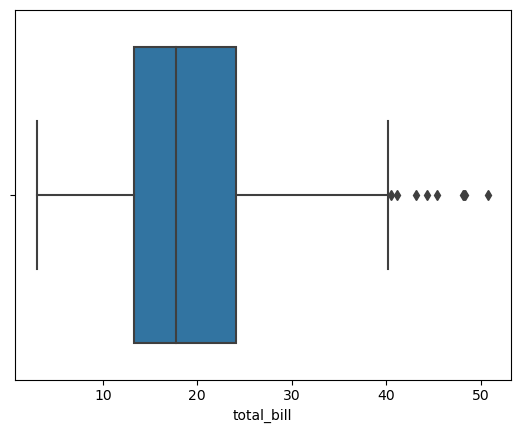

In [13]:
sns.boxplot(x=df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

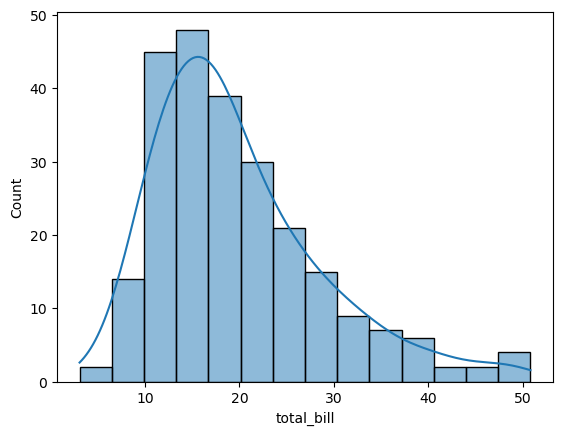

In [15]:
sns.histplot(df['total_bill'], kde=True) 
# data is right skewed
# use kde to see distribution with probability density function

In [16]:
df1 = sns.load_dataset('iris')

In [17]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

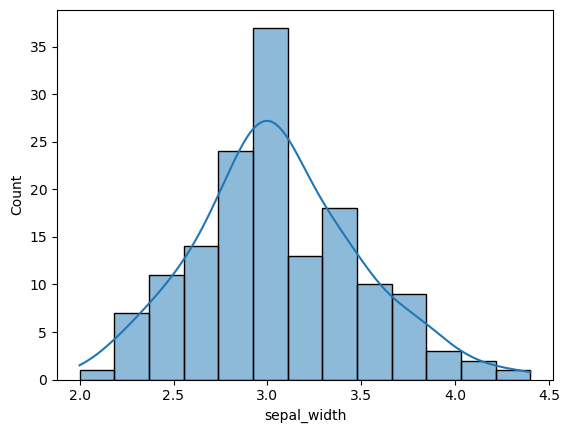

In [23]:
sns.histplot(df1['sepal_width'],kde=True)
# this follows gaussian/normal distribution

<AxesSubplot:xlabel='species', ylabel='count'>

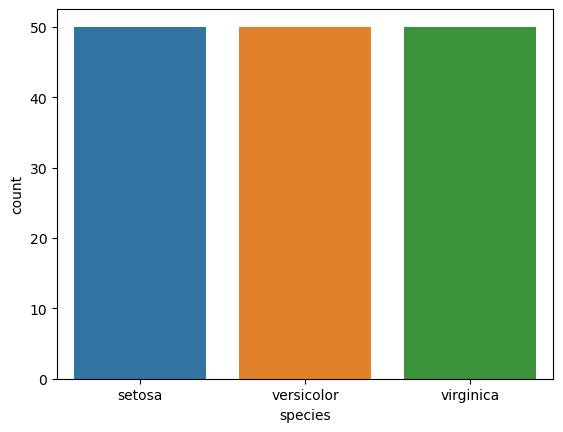

In [25]:
sns.countplot(x=df1['species'])

In [26]:
# get 25 and 75 percentile values
np.percentile(df1['sepal_length'], [25,75])

array([5.1, 6.4])

In [27]:
# part-2
# outliers
data = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<AxesSubplot:ylabel='Count'>

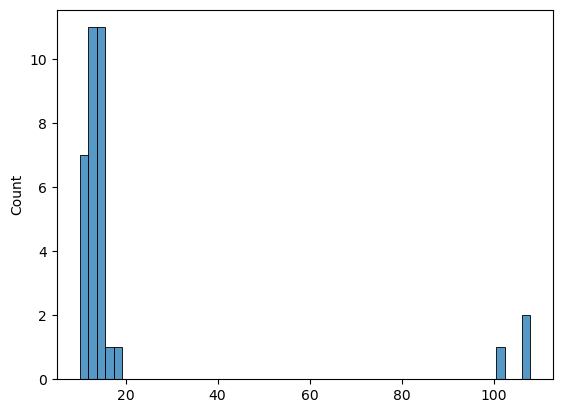

In [29]:
sns.histplot(data)

In [28]:
# by 68-95-99.7% rule after 3rd sd all values can be considered outliers
outliers = []

def detect_outliers(data):
    threshold = 3 # 3rd sd
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [30]:
ans = detect_outliers(data)
print(ans)

[102, 107, 108]


In [32]:
# IQR
data = sorted(data)
q1,q3 = np.percentile(data, [25,75])
iqr = q3-q1

In [33]:
lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

In [45]:
for i in data:
    if i < lower_fence or i > higher_fence:
        data.remove(i)

<AxesSubplot:ylabel='Count'>

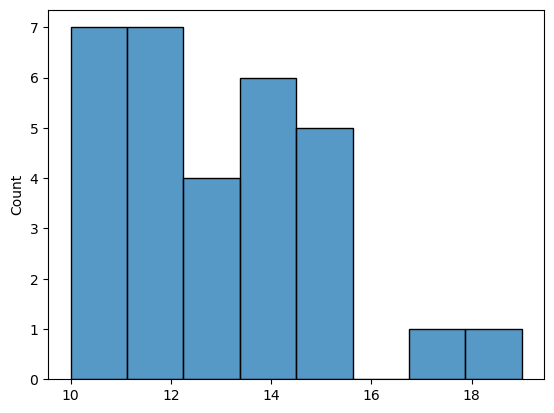

In [46]:
sns.histplot(data)

<AxesSubplot:>

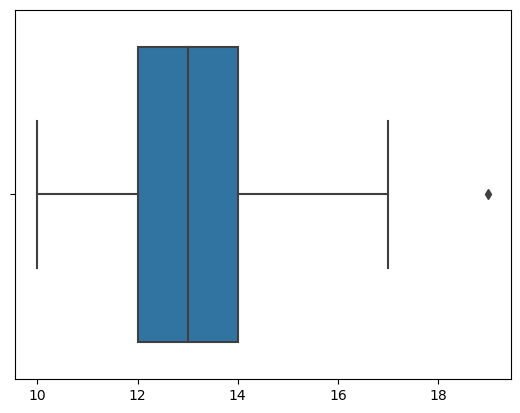

In [58]:
sns.boxplot(x=data)

In [54]:
dataset = data
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19]